In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
train_identity = pd.read_csv("./train_identity.csv")
train_transaction = pd.read_csv("./train_transaction.csv")

test_identity = pd.read_csv("./test_identity.csv")
test_transaction = pd.read_csv("./test_transaction.csv")

In [32]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [33]:
print("train's shape: ",train.shape)
print("test's shape: ",test.shape)

train's shape:  (590540, 434)
test's shape:  (506691, 433)


In [34]:
#change test colunms name
test_change_col = [col for col in test.columns if '-' in col]
def changeTestCol(x):
    return x.replace('-','_')

test_new_col = []
for col in test_change_col:
    test_new_col.append(changeTestCol(col))
    
test_new_col_dic = dict(zip(test_change_col,test_new_col))
test_new_col_dic

test.rename(columns = test_new_col_dic,inplace = True)
test.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)

In [35]:
#PCA Function
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

In [36]:
#combine train and test making PCA
test['isFraud'] = 'test'
df = pd.concat([train,test], axis=0)
df = df.reset_index()
df = df.drop('index', axis=1)
print(df.shape)

(1097231, 434)


In [37]:
mas_v = train.columns[55:394]
# print(train.columns[55:394])
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

for col in mas_v:
    df[col] = df[col].fillna((df[col].min() - 2))
    df[col] = (minmax_scale(df[col], feature_range=(0,1)))
    
df = PCA_change(df, mas_v, prefix='PCA_V_', n_components=30)
train,test = df[df['isFraud'] != 'test'], df[df['isFraud'] == 'test'].drop('isFraud', axis=1)

In [38]:
print("train's shape: ",train.shape)
print("test's shape: ",test.shape)

train's shape:  (590540, 125)
test's shape:  (506691, 124)


In [39]:
#upsample
from sklearn.utils import resample

not_fraud = train[train.isFraud == 0]
fraud = train[train.isFraud == 1]

fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.isFraud.value_counts()
train = upsampled

In [40]:
print("train's shape: ",train.shape)
print("test's shape: ",test.shape)

train's shape:  (1139754, 125)
test's shape:  (506691, 124)


In [41]:
train['TransactionAmt_to_card1_mean'] = train.TransactionAmt / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_card4_mean'] = train.TransactionAmt / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_card1_std'] = train.TransactionAmt / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_card4_std'] = train.TransactionAmt / train.groupby(['card4'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_card1_mean'] = test.TransactionAmt / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_card4_mean'] = test.TransactionAmt / test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_card1_std'] = test.TransactionAmt / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_card4_std'] = test.TransactionAmt / test.groupby(['card4'])['TransactionAmt'].transform('std')

In [42]:
train['id_02_to_card1_mean'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_card4_mean'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
train['id_02_to_card1_std'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_card4_std'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

test['id_02_to_card1_mean'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_card4_mean'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
test['id_02_to_card1_std'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
test['id_02_to_card4_std'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')


In [43]:
train['D15_to_card1_mean'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_card4_mean'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
train['D15_to_card1_std'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_card4_std'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

test['D15_to_card1_mean'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_card4_mean'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
test['D15_to_card1_std'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_card4_std'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')

In [44]:
train['D15_to_addr1_mean'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_addr2_mean'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
train['D15_to_addr1_std'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
train['D15_to_addr2_std'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

test['D15_to_addr1_mean'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_addr2_mean'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
test['D15_to_addr1_std'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
test['D15_to_addr2_std'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')

In [45]:
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

In [46]:
print("train's shape: ",train.shape)
print("test's shape: ",test.shape)

train's shape:  (1139754, 147)
test's shape:  (506691, 146)


In [47]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

big_top_values_cols = [col for col in train.columns if train[col]\
                       .value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_values_cols_test = [col for col in test.columns if test[col]\
                       .value_counts(dropna=False, normalize=True).values[0] > 0.9]

one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]

In [49]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_values_cols + \
                        big_top_values_cols_test + one_value_cols+ one_value_cols_test))


['id_26',
 'C3',
 'id_07',
 'id_27',
 'dist2',
 'id_21',
 'R_emaildomain_3',
 'id_08',
 'P_emaildomain_3',
 'id_25',
 'id_22',
 'id_24',
 'id_23']

In [50]:
train_new = train.drop(cols_to_drop, axis=1)
test_new = test.drop(cols_to_drop, axis=1)

In [52]:
print("train's shape: ",train_new.shape)
print("test's shape: ",test_new.shape)

train's shape:  (1139754, 134)
test's shape:  (506691, 133)


In [53]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
for col in cat_cols:
    if col in train_new.columns:
        le = LabelEncoder()
        le.fit(list(train_new[col].astype(str).values) + list(test_new[col].astype(str).values))
        train_new[col] = le.transform(list(train_new[col].astype(str).values))
        test_new[col] = le.transform(list(test_new[col].astype(str).values))   

In [54]:
X = train_new.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train_new.sort_values('TransactionDT')['isFraud']
#X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = test_new.drop(['TransactionDT', 'TransactionID'], axis=1)
test = test_new[["TransactionDT", 'TransactionID']]

In [55]:
print("X's shape: ",X.shape)
print("X_test's shape: ",X_test.shape)

X's shape:  (1139754, 131)
X_test's shape:  (506691, 131)


In [56]:
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold,GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
import time
from lightgbm import LGBMClassifier
import seaborn as sns

In [61]:
def train_model_classification(X, X_test, y, params, folds, model_type='lgb', eval_metric='auc', columns=None, plot_feature_importance=False, model=None,
                               verbose=10000, early_stopping_rounds=200, n_estimators=50000, splits=None, n_folds=3, averaging='usual', n_jobs=-1):
    """
    A function to train a variety of classification models.
    Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
    :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: y - target
    :params: folds - folds to split data
    :params: model_type - type of model to use
    :params: eval_metric - metric to use
    :params: columns - columns to use. If None - use all columns
    :params: plot_feature_importance - whether to plot feature importance of LGB
    :params: model - sklearn model, works only for "sklearn" model type
    
    """
    columns = X.columns if columns is None else columns
    n_splits = folds.n_splits if splits is None else n_folds
    X_test = X_test[columns]
    
    # to set up scoring parameters
    metrics_dict = {'auc': {'lgb_metric_name':eval_auc,
                        'catboost_metric_name': 'AUC',
                        'sklearn_scoring_function': metrics.roc_auc_score},
                    }
    
    result_dict = {}
    if averaging == 'usual':
        # out-of-fold predictions on train data
        oof = np.zeros((len(X), 1))

        # averaged predictions on train data
        prediction = np.zeros((len(X_test), 1))
        
    elif averaging == 'rank':
        # out-of-fold predictions on train data
        oof = np.zeros((len(X), 1))

        # averaged predictions on train data
        prediction = np.zeros((len(X_test), 1))

    
    # list of scores on folds
    scores = []
    feature_importance = pd.DataFrame()
    
    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[columns][train_index], X[columns][valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params, n_estimators=n_estimators, n_jobs = n_jobs)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                    verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
            y_pred_valid = model.predict_proba(X_valid)[:, 1]
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)[:, 1]
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=n_estimators, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=verbose, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
            print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
            print('')
            
            y_pred = model.predict_proba(X_test)
        
        if model_type == 'cat':
            model = CatBoostClassifier(iterations=n_estimators, eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
                                      loss_function=Logloss)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        if averaging == 'usual':
            
            oof[valid_index] = y_pred_valid.reshape(-1, 1)
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
            
            prediction += y_pred.reshape(-1, 1)

        elif averaging == 'rank':
                                  
            oof[valid_index] = y_pred_valid.reshape(-1, 1)
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
                                  
            prediction += pd.Series(y_pred).rank().values.reshape(-1, 1)        
        
        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_splits
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['scores'] = scores
    
    if model_type == 'lgb':
        if plot_feature_importance:
            feature_importance["importance"] /= n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
            
            result_dict['feature_importance'] = feature_importance
            result_dict['top_columns'] = cols
        
    return result_dict


In [64]:
def eval_auc(y_true, y_pred):
    """
    Fast auc eval function for lgb.
    """
    return 'auc', fast_auc(y_true, y_pred), True

In [65]:
def fast_auc(y_true, y_prob):
    """
    fast roc_auc computation: https://www.kaggle.com/c/microsoft-malware-prediction/discussion/76013
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc

pandas.core.series.Series

Fold 1 started at Tue Jul  7 15:48:20 2020
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.998167	training's auc: 0.998167	valid_1's auc: 0.903567	valid_1's auc: 0.903567
Early stopping, best iteration is:
[388]	training's auc: 0.996302	training's auc: 0.996302	valid_1's auc: 0.904463	valid_1's auc: 0.904463
Fold 2 started at Tue Jul  7 17:01:20 2020
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[296]	training's auc: 0.993561	training's auc: 0.993561	valid_1's auc: 0.927758	valid_1's auc: 0.927758
Fold 3 started at Tue Jul  7 18:01:22 2020
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.998376	training's auc: 0.998376	valid_1's auc: 0.918792	valid_1's auc: 0.918792
Early stopping, best iteration is:
[305]	training's auc: 0.994446	training's auc: 0.994446	valid_1's auc: 0.920098	valid_1's auc: 0.920098
Fold 4 started at Tue Jul  7 19:04:53 2020
Training until va

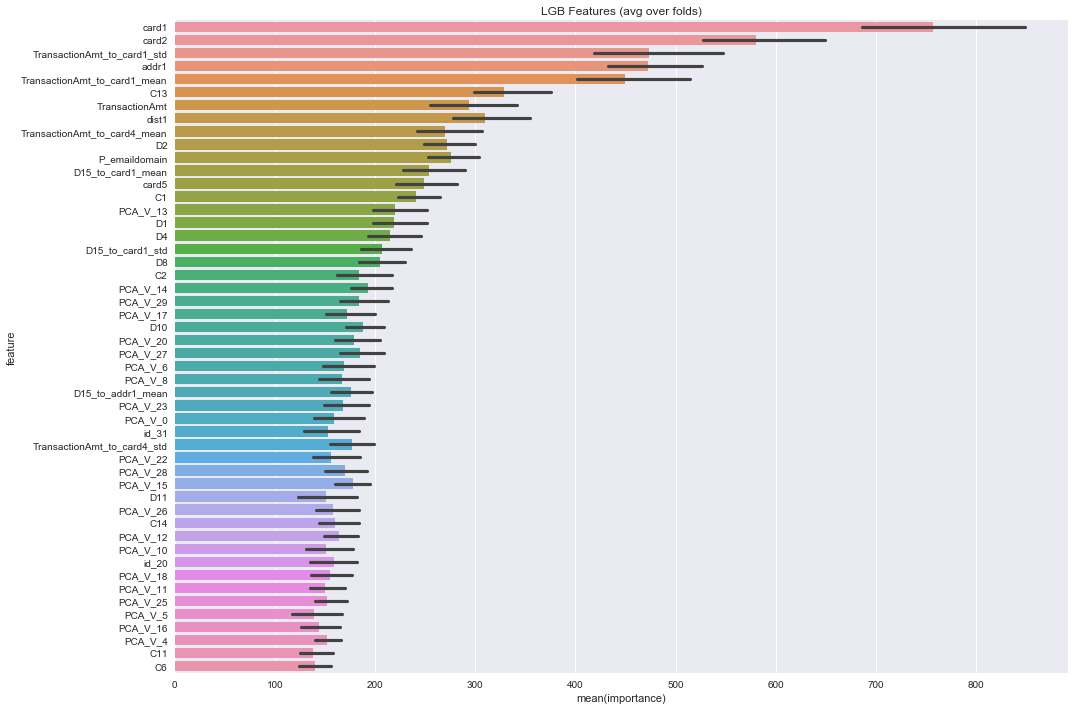

In [69]:
n_fold = 5
folds = TimeSeriesSplit(n_splits=n_fold)
folds = KFold(n_splits=5)

params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          #'categorical_feature': cat_cols
         }
result_dict_lgb = train_model_classification(X=X, X_test=X_test, y=y.astype('int'), params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', n_jobs=-1)


# Fold 1 started at Fri Jun 19 08:43:50 2020
# Training until validation scores don't improve for 200 rounds
# [500]	training's auc: 0.993648	training's auc: 0.993648	valid_1's auc: 0.916792	valid_1's auc: 0.916792
# Early stopping, best iteration is:
# [485]	training's auc: 0.993399	training's auc: 0.993399	valid_1's auc: 0.916953	valid_1's auc: 0.916953
# Fold 2 started at Fri Jun 19 09:32:11 2020
# Training until validation scores don't improve for 200 rounds
# [500]	training's auc: 0.994443	training's auc: 0.994443	valid_1's auc: 0.930257	valid_1's auc: 0.930257
# Early stopping, best iteration is:
# [543]	training's auc: 0.99529	training's auc: 0.99529	valid_1's auc: 0.930586	valid_1's auc: 0.930586
# Fold 3 started at Fri Jun 19 10:23:50 2020
# Training until validation scores don't improve for 200 rounds
# [500]	training's auc: 0.994738	training's auc: 0.994738	valid_1's auc: 0.926398	valid_1's auc: 0.926398
# Early stopping, best iteration is:
# [438]	training's auc: 0.993013	training's auc: 0.993013	valid_1's auc: 0.92693	valid_1's auc: 0.92693
# Fold 4 started at Fri Jun 19 11:08:08 2020
# Training until validation scores don't improve for 200 rounds
# [500]	training's auc: 0.994645	training's auc: 0.994645	valid_1's auc: 0.946585	valid_1's auc: 0.946585
# Early stopping, best iteration is:
# [518]	training's auc: 0.995035	training's auc: 0.995035	valid_1's auc: 0.946811	valid_1's auc: 0.946811
# Fold 5 started at Fri Jun 19 11:57:53 2020
# Training until validation scores don't improve for 200 rounds
# [500]	training's auc: 0.994863	training's auc: 0.994863	valid_1's auc: 0.923413	valid_1's auc: 0.923413
# Early stopping, best iteration is:
# [300]	training's auc: 0.98769	training's auc: 0.98769	valid_1's auc: 0.924343	valid_1's auc: 0.924343
# CV mean score: 0.9291, std: 0.0099.

In [70]:
X.head()

,C1,C10,C11,C12,C13,C14,C2,C4,C5,C6,...,D15_to_card1_std,D15_to_card4_std,D15_to_addr1_mean,D15_to_addr2_mean,D15_to_addr1_std,D15_to_addr2_std,P_emaildomain_1,P_emaildomain_2,R_emaildomain_1,R_emaildomain_2
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25,0,25,0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,2,25,0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.939952,1.672862,1.767252,1.945398,1.511227,1.568307,28,2,25,0
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,4.0,...,0.549318,0.612837,1.018268,0.685521,0.654339,0.552642,44,2,25,0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,15,2,25,0
